# Clase 2

Vamos a importar todos los módulos que vamos a ir usando

In [15]:
import numpy as np
import pandas as pd
import matplotlib
import h2o
import sklearn

Listo, están todos instalados y funcionando (los importé para ver si alguno tiraba error por no estar previamente instalado)

***

Gestión de activos:
- Mantenimiento reactivo: quiero arreglar algo que ya ocurrió o que ya se rompió
- Monitoreo de procesos: trabajo mientras todo sucede, actúo frente a los primeros síntomas
- Mantenimiento predictivo: me adelanto a los hechos en función de síntomas
- Mantenimiento preventivo: actúo antes de ver los síntomas

Gestión de eventos anormales:
1. Detección
2. Identificación
3. Diagnóstico
4. Mitigación

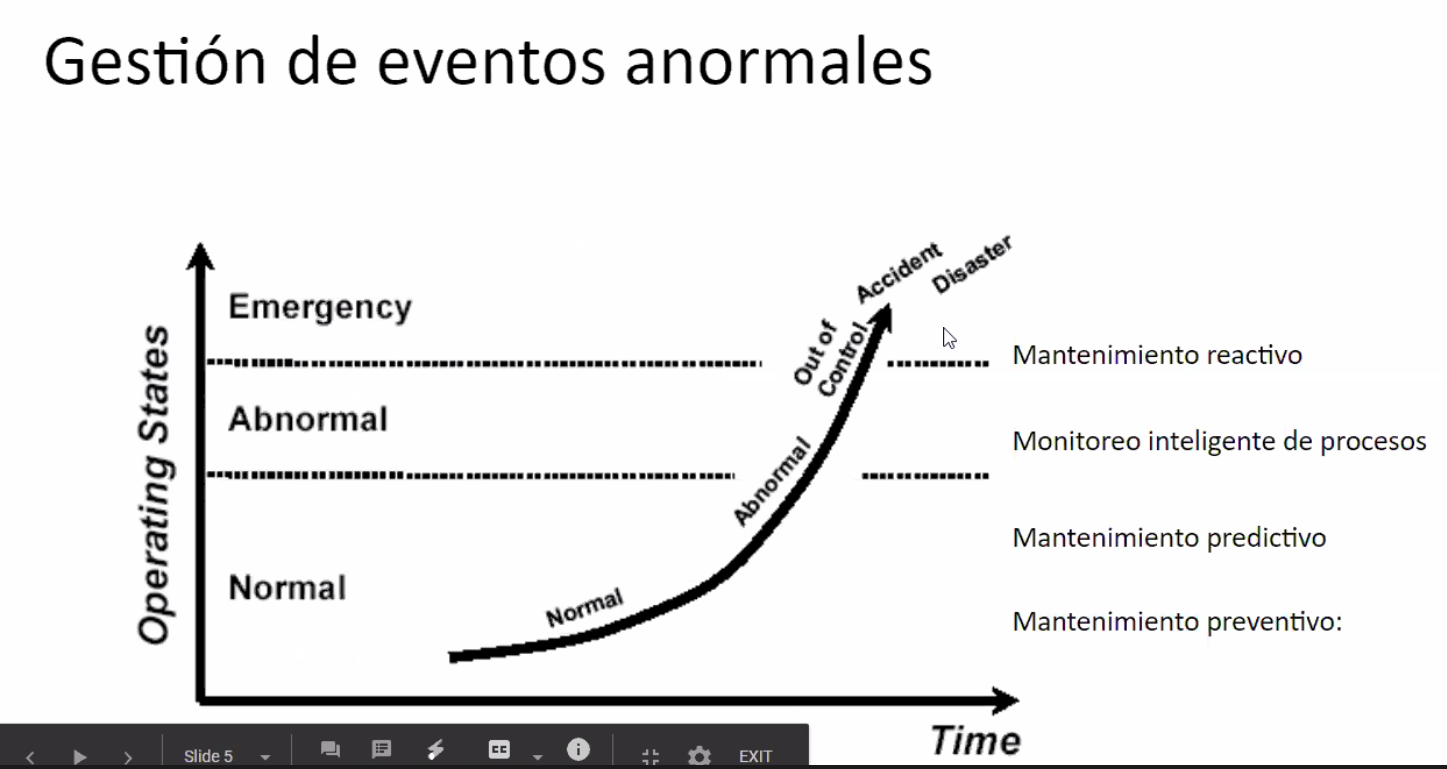

Debo lograr los 4 pasos antes de que el tema se salga de control.

### Adquisición de datos

Laboratorio tradicional:
- Turnos
- Roles internos (analistas, supervisores, ...)
- Jefe de laboratorio: **candidato a usar estas técnicas**
- Dependencia jerárquica del jefe
- Frecuencia de adquisición (días o fracciones)

Ahora... Cada vez hay más procesos online, cromatógrafos midiendo en continuo, procesos automatizados.
<br>
**Process Analytical Technology**
- Desplazamiento del laboratorio: ya no será como antes (ya no lo es). Ahora todo es desde la compu casi
- Vacío administrativo
- Oportunidad y amenaza
- Frecuencia de adquisición (horas o fracciones)

Historizadores:
- Frecuencia de adquisición (minutos o fracciones)
- Tengo todas las variables disponibles en la PC
<br>
Yo termino decidiendo *cómo voy a decidir*

***

## Primer filtro: promedio

Nuestro problema es la falta de tiempo para analizar, no la cantidad de datos

Promediar:
- Elimino el ruido
- Elimino transcientes asociados al sistema de control
- **Teorema Central del Límite**: puedo usarlo!

Estadística paramétrica: era de pocos datos. Hoy ya no vale mucho la pena. Ahora, con tantos datos, puedo dejar de suponer normalidad y, mediante el TCL, obtengo algo *normal*.

El promedio yo se lo pido al historizador. Éste tiene dos forma de hacerlo

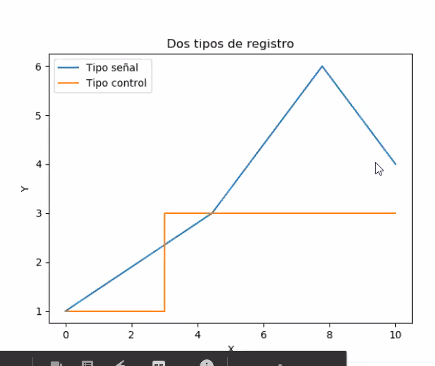

Formas de medir:
- Tipo señal: mido el valor posta
- Tipo control: elijo un *setpoint* o *threshold*

Para ahorrar memoria, no guardan los valores cada vez que miden. Si el valor medido es igual a la anterior $\pm$ un delta, asume que es el mismo

Por qué un promedio horario (en el sentido de t = hora)?
- Depende del tiempo característico del fenómeno que estudio
- Depende de si puedo suponer estado estacionario

Las operaciones que pueden pasar de todo bien a **todo mal** en tiempos que no son "humanos", **SIEMPRE SON AUTOMATIZADOS** por una cuestión de seguridad

## Filtro de estado estacionario

Por qué se me ocurre suponer estado estacionario?
- El sistema no sería un sistema termodinámico definido

Es importante suponer EE y **verificar** EE. Es la situación más representativa de una planta: ésta está más tiempo andando, no está arrancando o parando

Filtros disponibles:
- Promedio (representatitivdad)
- Mediana móvil (robustez)
- Ventana móvil con eliminación de valores fuera de rango
- Fourier

## Segundo filtro

Datos mal medidos:
- NaN
- Negativos
- Sin sentido físico
- Outliers
- Proceso apagado
- Proceso en transición
- Filtro pasa-bajos

### Cuarto filtro

Outliers multivariado
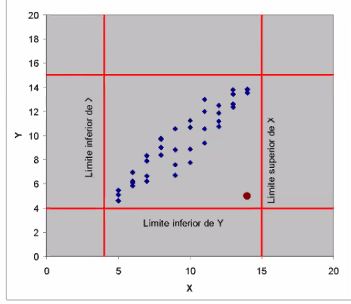

El filtrado de datos lleva **mucho tiempo** en general
- Dato mal medido: eliminar la fila! (suele haber tantos datos que es mejor sacar la fila que ponerse a pensar cómo reemplazar el dato por alguno representativo

- Sacar outliers multivariados utilizando la **distancia de Mahalanovis** que tiene en cuenta lo que se ve en la imagen

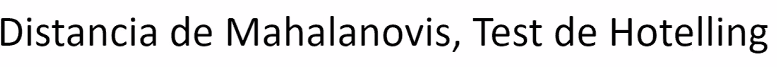

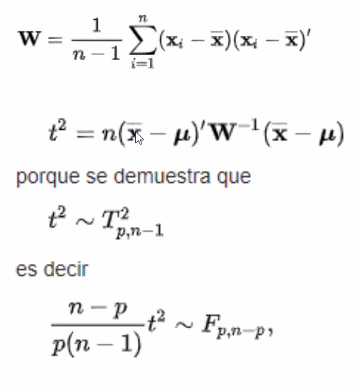

- Es necesrio repetir varias veces para mejorar la estimación de la matriz de covarianza

- Calculo matriz de Covarianza con una distancia de Mahalanobis
- Vuelvo a calcularla...
- Vuelvo a eliminar los que están muy lejos

***

## ANÁLISIS PRELIMINAR

Vamos a hacer lo que no hay que hacer: empezar a trabajar sin analizar previamente y *analizando* luego cuando todo empieza a dar mal

Herramientas:
- Box-Plot

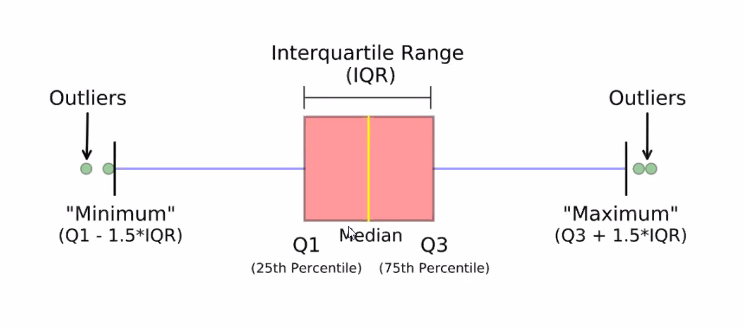

- Matriz de correlación

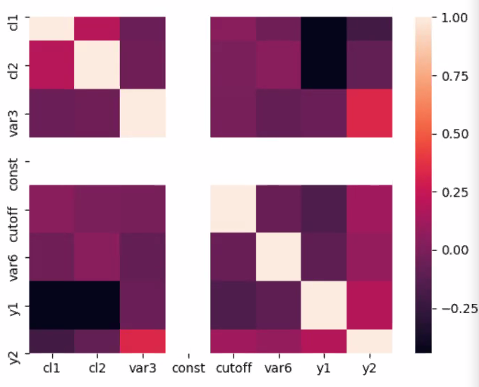

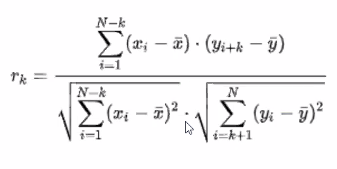

**Matriz de correlación es Matriz de covarianza dividido el SD**

Qué pasa con una variable mientras la otra suba o baja (veo relaciones entre variables)

***
#### NOTA
Cuándo vale la pena normalizar?
- Si las dimensiones de los datos me aporta información, no se normaliza

- Si los números son distintos tipo temperatua y presiones ahí no me importa y de hecho molesta, ahí normalizo!
***

- Histograma

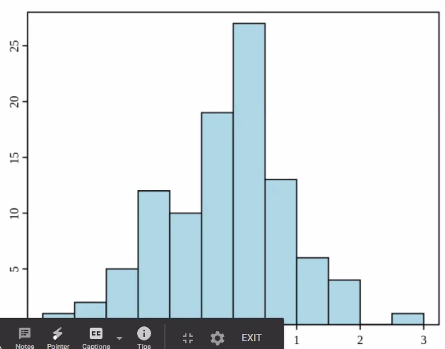

***

### EJEMPLO PROBLEMA

- 6 variables en el dominio
- 2 variables en la imagen
- 2 modelos independientes

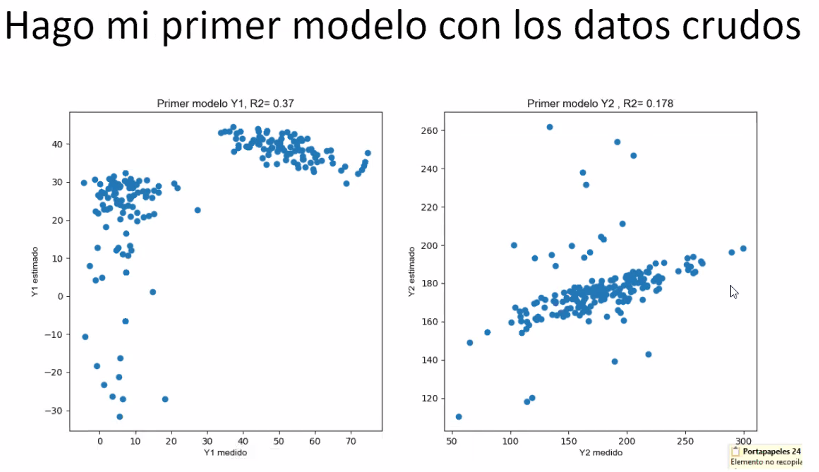

En **X** tengo los medidos y en **Y** los predichos. Debería dar una línea a 45º y no, nada que ver

Miramo la matriz de correlación

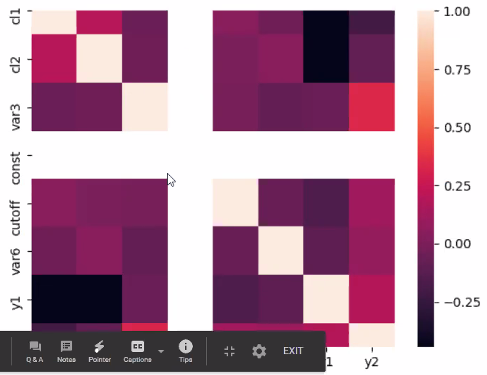

Luego los Box-Plot

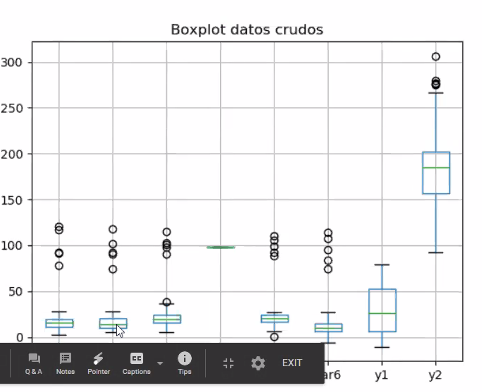

Muchos outliers! Vamos a Sacar los > 50

Recalculamos sin outliers

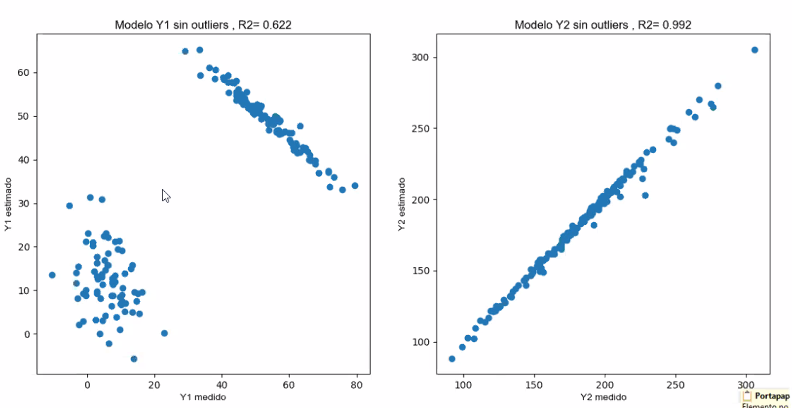

El 2do quedó joya, el otro no
<br>
El primero medio feito aún. Sacamos el "cutoff" que era el que se veía feo (no puse la imagen)

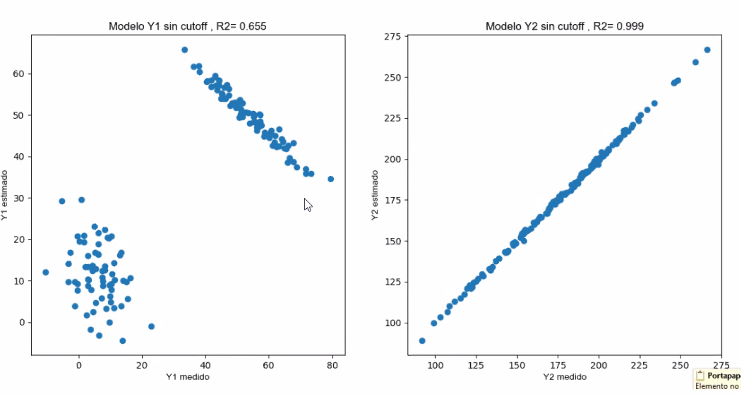

El 2do mejoró un poco, el otro aún no, pero se ve que **son dos grupos**

Clusterizamos, separamos en 2 grupos el primer gráfico

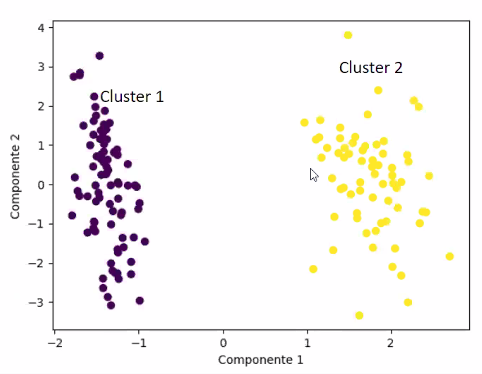

Se ve que los clusters se separan re bien. Ahora hago 2 modelos, uno para cada cluster

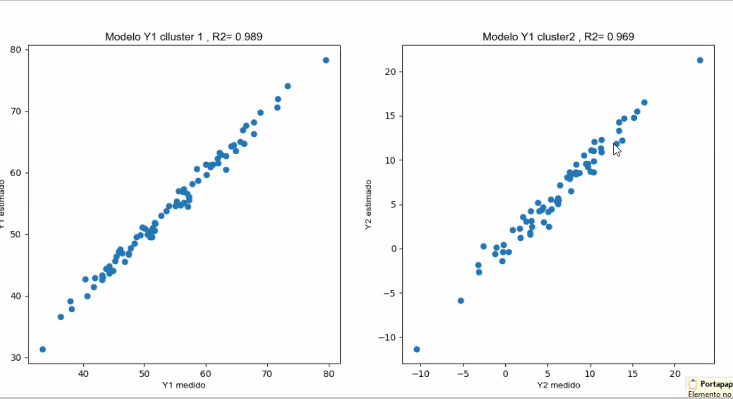

#### Otro problema

Plan de trabajo:
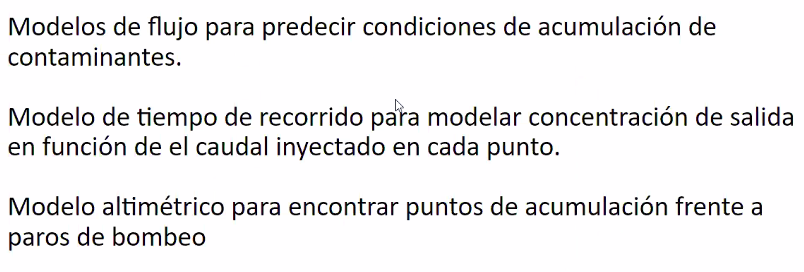

   Está en las diapos, era mucha data e info jeje
   ***

### Reconciliación de datos

Tema muy importante en la industria de procesos.
Idea: 
- Tomar un conjunto de datos medidos
- Mejorar la medición en función de lo que conozco del sistema (balance de masa, cinética, constantes de equilibrio, ..)